<a href="https://colab.research.google.com/github/Otobi1/Bike-Demand-Prediction/blob/master/Bike_Demand_Prediction_Final_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries 

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import pickle

print ('Libraries successfully imported!')

Libraries successfully imported!


In [2]:
# Getting the data directly from the repo http://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand, 
# Here you have a brief description of the dataset and the attributes

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

--2021-04-17 07:55:03--  http://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604166 (590K) [application/x-httpd-php]
Saving to: ‘SeoulBikeData.csv.2’

SeoulBikeData.csv.2 100%[===================>] 590.01K   869KB/s    in 0.7s    

2021-04-17 07:55:05 (869 KB/s) - ‘SeoulBikeData.csv.2’ saved [604166/604166]



In [3]:
# Reading the data into a pandas dataframe

df = pd.read_csv("./SeoulBikeData.csv", encoding="unicode_escape")

# Making a copy of the original dataset

data = df.copy()

In [4]:
# Checking a sample of 10 observations, you can choose as much sample as you want

data.sample(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6070,10/08/2018,1544,22,30.9,54,0.8,2000,20.5,0.00,0.0,0.0,Summer,No Holiday,Yes
5043,29/06/2018,227,3,22.3,96,1.2,290,21.6,0.00,0.1,0.0,Summer,No Holiday,Yes
5001,27/06/2018,1238,9,20.0,96,1.6,287,19.3,0.39,0.0,0.0,Summer,No Holiday,Yes
2884,31/03/2018,163,4,10.4,73,1.7,801,5.7,0.00,0.0,0.0,Spring,No Holiday,Yes
1709,10/02/2018,41,5,1.8,75,2.0,484,-2.1,0.00,0.0,0.0,Winter,No Holiday,Yes
6341,22/08/2018,289,5,23.4,82,0.4,2000,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
5028,28/06/2018,1158,12,27.0,68,2.0,1863,20.5,1.30,0.0,0.0,Summer,No Holiday,Yes
1686,09/02/2018,117,6,-4.0,41,0.8,1242,-15.3,0.00,0.0,0.0,Winter,No Holiday,Yes
1548,03/02/2018,192,12,-6.0,38,3.4,1930,-18.0,2.04,0.0,0.0,Winter,No Holiday,Yes
3538,27/04/2018,789,10,15.3,50,1.0,944,4.9,1.97,0.0,0.0,Spring,No Holiday,Yes


In [5]:
# Checking the shape of the data

data.shape

(8760, 14)

In [6]:
# Problem statment and objective

"""Predict the 'Rented Bike Count', essentially the demand based on other attributes."""

"Predict the 'Rented Bike Count', essentially the demand based on other attributes."

In [7]:
# Reviewing the data types and the variables with null values 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# Checking the null values (missing data) for the variables

data.isnull().sum() # No missing data

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Exploring the descriptive statistics for the numerical variables of the dataset.

data.describe() # note that this function will not return descriptives for categorical variables, only for continous variables

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
# Dropped the date variable, not certain what to do with it at this point (could be explored later on)

data = data.drop('Date', axis=1)

In [11]:
# Checking the variable labels

data.keys()

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Changing the variable names to improve readability 

features = {'Rented Bike Count': 'Bike Demand', 
            'Hour': 'Time of Day', 
            'Temperature(°C)': 'Temperature', 
            'Humidity(%)': 'Humidity', 
            'Wind speed (m/s)': 'Wind Speed', 
            'Visibility (10m)': 'Visibility', 
            'Dew point temperature(°C)': 'Dew Point Temperature', 
            'Solar Radiation (MJ/m2)': 'Solar Radiation', 
            'Rainfall(mm)': 'Rainfall', 
            'Snowfall (cm)': 'Snowfall', 
            'Seasons': 'Seasons', 
            'Holiday': 'Holiday', 
            'Functioning Day': 'Working Day'}

data = data.rename(columns=features)

data.head()

,Bike Demand,Time of Day,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Working Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
# Exploring the correlations between each of the variables and bike demand before feature engineering.

data.corr()

# Inference: some variables are highly positively correlated with bike demand while others are negatively correlated, 
# which means as that as the condition worsens, bike demand reduces

,Bike Demand,Time of Day,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall
Bike Demand,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Time of Day,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind Speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew Point Temperature,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


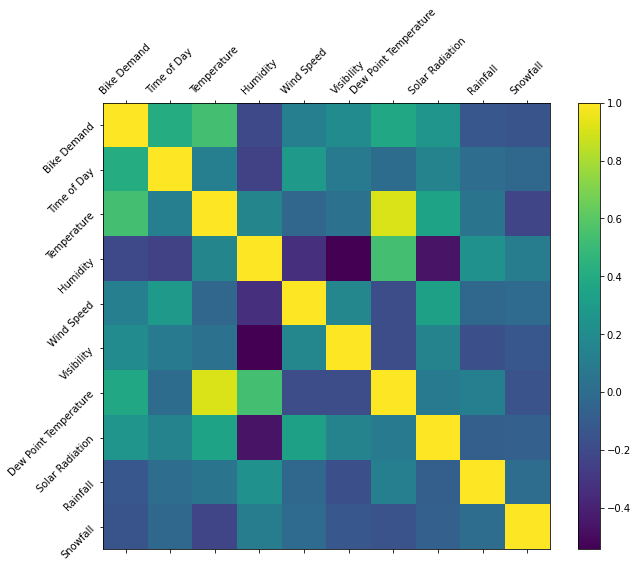

In [14]:
# Exploring the correlation between each of the continous variables and the target (outcome), in this case, the number of bikes rented using a correlation matrix.

f = plt.figure(figsize=(10, 8))
plt.matshow(data.corr(), fignum=f.number)
continous_features = data.describe().columns
plt.xticks(range(len(continous_features)), continous_features, rotation='45')
plt.yticks(range(len(continous_features)), continous_features, rotation='45')
plt.colorbar()
#plt.title('Correlation Matrix', fontsize=14)
plt.show()

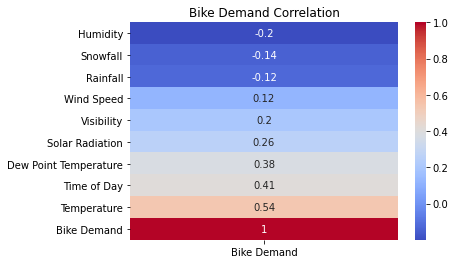

In [15]:
# Generating a heatmap to clearly outlay which variables are negatively and positively correlated with the Bike Demand

sns.heatmap(data.corr()[['Bike Demand']].sort_values('Bike Demand'), cmap='coolwarm', annot=True)
plt.title('Bike Demand Correlation')
plt.show()

# Inference here indicates that the temperature, the time of the day, dew point temperature, solar radiation are the biggest predictors of bike demand
# Higher temperature and daylight, including sunny days would result in higher bike renting. 
# the hummidity, snowfall and rainfall also affects bike renting; as these conditions worsen (increase), the demand for bikes reduces

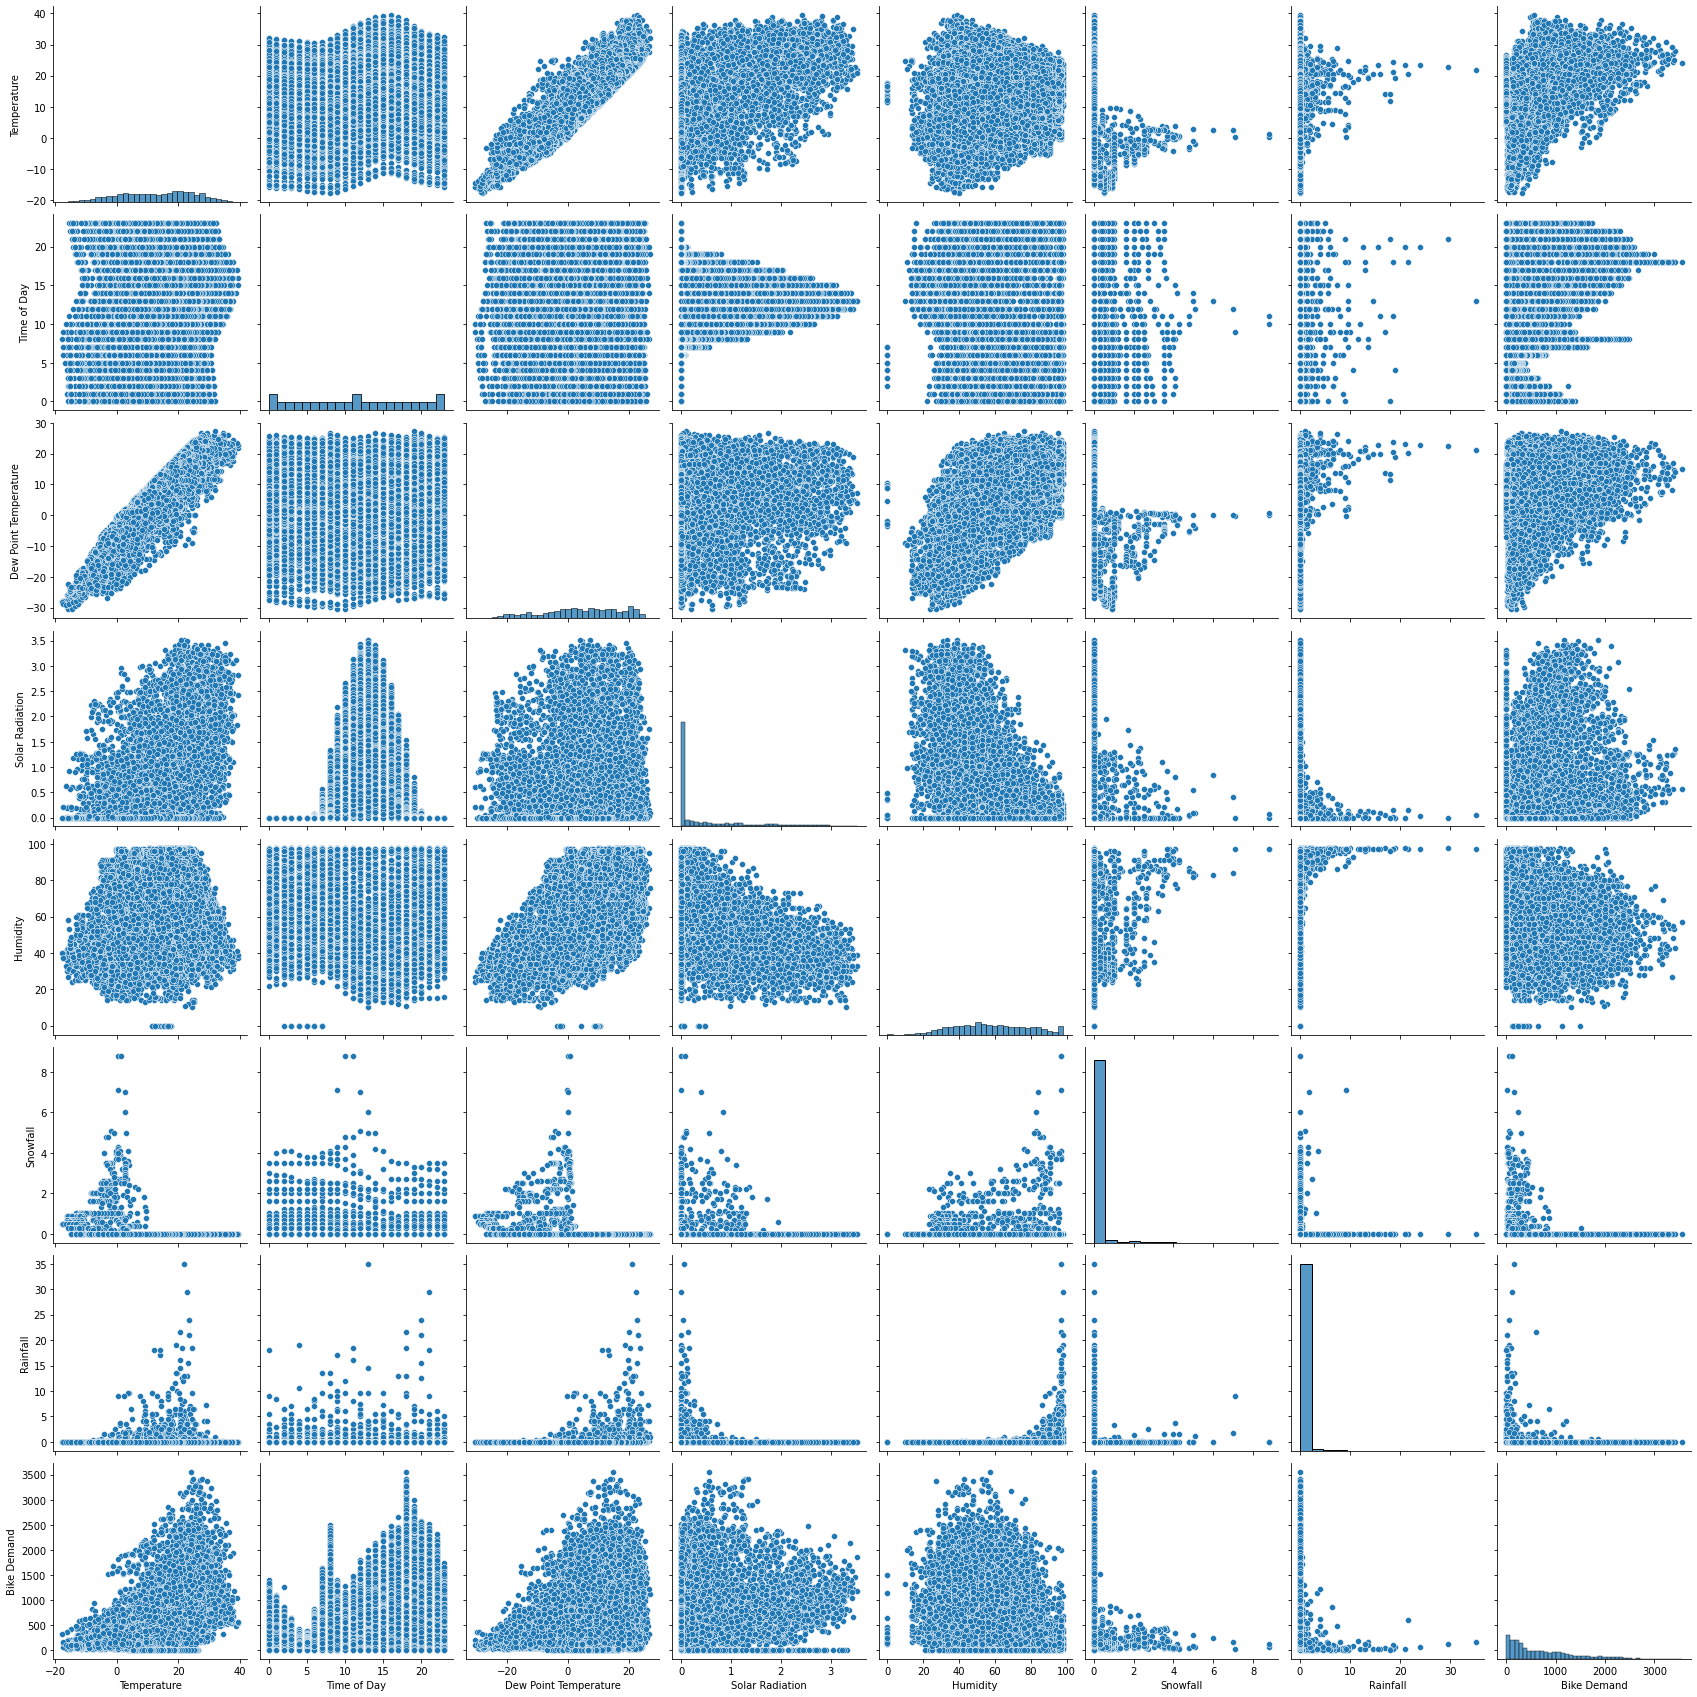

In [16]:
# Making a pairplot for the relevant variables identified above.

sns.pairplot(data[['Temperature', 'Time of Day', 'Dew Point Temperature', 'Solar Radiation', 'Humidity', 'Snowfall', 'Rainfall', 'Bike Demand']], height=3)


# sns.pairplot(data[data.describe().columns]) # this returns the pairplot for all the continous variables

In [17]:
# Checking the list of variables

data.keys()

Index(['Bike Demand', 'Time of Day', 'Temperature', 'Humidity', 'Wind Speed',
       'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Working Day'],
      dtype='object')

In [18]:
# Getting the dummy variables for the Seasons feature, also dropping the first column to guide against the 'dummy variable' trap, essentially multicollinearity

Seasons = pd.get_dummies(data['Seasons'], drop_first=True)

In [19]:
# Dropping the existing Seasons feature from the dataset

data = data.drop('Seasons', axis = 1)

In [20]:
# Concatenating the dataset, with the original seasons feature dropped with the new seasons dataframe with the dummy variables

data = pd.concat([data, Seasons], axis=1)

In [21]:
# Getting the dummy variables for the Holiday feature, also dropping the first column to guide against the 'dummy variable' trap, essentially multicollinearity

Holidays = pd.get_dummies(data['Holiday'], drop_first=True)

In [22]:
# Dropping the existing Holiday feature from the dataset

data = data.drop('Holiday', axis=1)

In [23]:
# Concatenating the dataset, with the original holiday feature dropped with the new seasons dataframe with the dummy variables

data = pd.concat([data, Holidays], axis=1)

In [24]:
# Getting the dummy variables for the Working Day feature, also dropping the first column to guide against the 'dummy variable' trap, essentially multicollinearity

WorkingDay = pd.get_dummies(data['Working Day'], drop_first=True)

In [25]:
# Dropping the existing Working Day feature from the dataset

data = data.drop('Working Day', axis=1)

In [26]:
# Since the Working Day feature has yes/no features, the column label needs to be properly labelled, hence the need for the prefix

WorkingDay = WorkingDay.add_prefix('WorkingDay ')

In [27]:
# Concatenating the dataset, with the original Working Day feature dropped with the new seasons dataframe with the dummy variables

data = pd.concat([data, WorkingDay], axis=1)

In [28]:
# Checking the complete dataframe wih all the dummy variables created.

data.sample(20)

,Bike Demand,Time of Day,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Spring,Summer,Winter,No Holiday,WorkingDay Yes
4828,249,4,19.1,82,1.5,471,15.9,0.00,0.0,0.0,0,1,0,1,1
4536,926,0,19.1,82,2.2,874,15.9,0.00,0.0,0.0,0,1,0,1,1
7655,914,23,14.1,74,1.5,486,9.5,0.00,0.0,0.0,0,0,0,1,1
7320,0,0,13.0,72,1.8,1987,8.0,0.00,0.0,0.0,0,0,0,1,0
8197,798,13,14.5,74,1.3,610,9.9,0.75,0.0,0.0,0,0,0,1,1
888,192,0,-3.8,48,0.7,1574,-13.2,0.00,0.0,0.0,0,0,1,1,1
5378,600,2,24.9,86,1.3,1469,22.3,0.00,0.0,0.0,0,1,0,1,1
3974,1092,14,28.5,33,0.9,1348,10.6,2.51,0.0,0.0,1,0,0,1,1
7586,512,2,8.0,74,0.5,1786,3.6,0.00,0.0,0.0,0,0,0,1,1
6263,1342,23,25.9,52,1.3,2000,15.2,0.00,0.0,0.0,0,1,0,1,1


In [29]:
# Exploring the correlations between each of the variables and bike demand after feature engineering.

data.corr()

,Bike Demand,Time of Day,Temperature,Humidity,Wind Speed,Visibility,Dew Point Temperature,Solar Radiation,Rainfall,Snowfall,Spring,Summer,Winter,No Holiday,WorkingDay Yes
Bike Demand,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,2.288822e-02,2.965494e-01,-4.249251e-01,0.072338,0.203943
Time of Day,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.686710e-19,1.686710e-19,-1.019481e-19,0.000000,0.005439
Temperature,0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,7.959684e-03,6.658462e-01,-7.387196e-01,0.055931,-0.050170
Humidity,-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,1.569416e-02,1.925949e-01,-2.382952e-01,0.050278,-0.020800
Wind Speed,0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,8.385451e-02,-6.469790e-02,1.091865e-01,-0.023017,0.005037
Visibility,0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,-1.874983e-01,6.195792e-02,8.616224e-03,-0.031773,-0.026000
Dew Point Temperature,0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,2.055888e-03,6.523778e-01,-7.223664e-01,0.066759,-0.052837
Solar Radiation,0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,7.997416e-02,1.284017e-01,-1.784202e-01,0.005077,-0.007665
Rainfall,-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,1.759519e-02,5.392817e-02,-5.875456e-02,0.014269,0.002055
Snowfall,-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,-9.978516e-02,-9.978516e-02,2.258745e-01,0.012591,0.032089


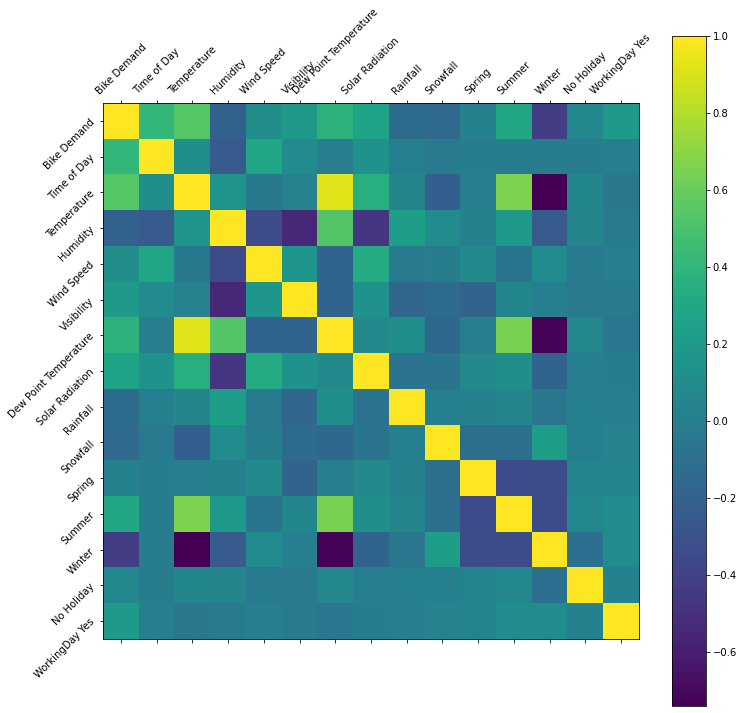

In [30]:
# Checking the correlation after feature engineering and the creation of dummy variables.

f = plt.figure(figsize=(12, 12))
plt.matshow(data.corr(), fignum=f.number)
continous_features = data.describe().columns
plt.xticks(range(len(continous_features)), continous_features, rotation='45')
plt.yticks(range(len(continous_features)), continous_features, rotation='45')
plt.colorbar()
#plt.title('Correlation Matrix', fontsize=14)
plt.show()

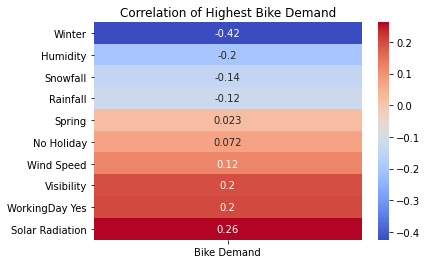

In [31]:
# Generating a heatmap to clearly outlay which variables are negatively and positively correlated with the extremes of bike demand, first top values of demand (head)

sns.heatmap(data.corr()[['Bike Demand']].sort_values('Bike Demand').head(10), cmap='coolwarm', annot=True)
plt.title('Correlation of Highest Bike Demand')
plt.show()

# this correlation is conducted after the creation of dummy variables.  
# Inference: Solar Radiation, WorkingDay Yes, Visibility, Wind Speed are positively correlated (although intuitively) with higher bike demand
# while Winter conditions, high humidity, snowfall and rainfall reduces bike demand

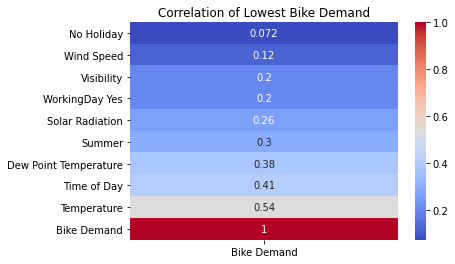

In [32]:
# Generating a heatmap to clearly outlay which variables are negatively and positively correlated with the extremes of bike demand, first lowest values of demand (tail)

sns.heatmap(data.corr()[['Bike Demand']].sort_values('Bike Demand').tail(10), cmap='coolwarm', annot=True)
plt.title('Correlation of Lowest Bike Demand')
plt.show()

# Interestingly, the temperature, time of day, dew point temperature also plays a significant role in the inverse determination of bike demand.

In [33]:
data.keys()

Index(['Bike Demand', 'Time of Day', 'Temperature', 'Humidity', 'Wind Speed',
       'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Spring', 'Summer', 'Winter', 'No Holiday',
       'WorkingDay Yes'],
      dtype='object')

In [34]:
# Separating the variables into X and y, independent variables and the dependent variables 

X = data[['Time of Day', 'Temperature', 'Humidity', 'Wind Speed',
       'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Spring', 'Summer', 'Winter', 'No Holiday',
       'WorkingDay Yes']]

y = data['Bike Demand']

In [37]:
# Determining the training, test splits
# Not using the validation split, might as well just do a 80/20 train and test split

TRAIN_SIZE = 0.8
TEST_SIZE = 0.20

In [38]:
# Splitting the train set and the test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = TRAIN_SIZE)

In [39]:
#Checking the sizes of the train set and the test set

print (f'train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n'
       f'test:{len(X_test)} ({(len(X_test) / len(X)):.2f})')

train: 7008 (0.80)
test:1752 (0.20)


In [41]:
# Designing the model - Linear Regression 

lin_reg = LinearRegression()

In [42]:
# Fitting the model to the training set 

lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Checking the predictions from the linear regression model

lin_reg_y_pred = lin_reg.predict(X_test)

print ('Predicted bike demand:\n', lin_reg_y_pred[:5])

Predicted bike demand:
 [ 294.17007412  -67.88472016  996.79427968 1387.03339494 1317.64415393]


In [44]:
# Printing the actual labels for the test instances 

print ('Actual bike demand for the tested instances:\n',  (y_test[:5]))

Actual bike demand for the tested instances:
 475      190
1494      95
4549    1314
5470    1934
4073    2355
Name: Bike Demand, dtype: int64


In [46]:
# Model evaluation with the coefficient of determination (r2_score)

coeff_determination = r2_score(y_test, lin_reg_y_pred)
coeff_determination

# Inference: performance on the linear regression not so great. 
# ######### check out the best explanation for coeff of determination

0.5524836920808515

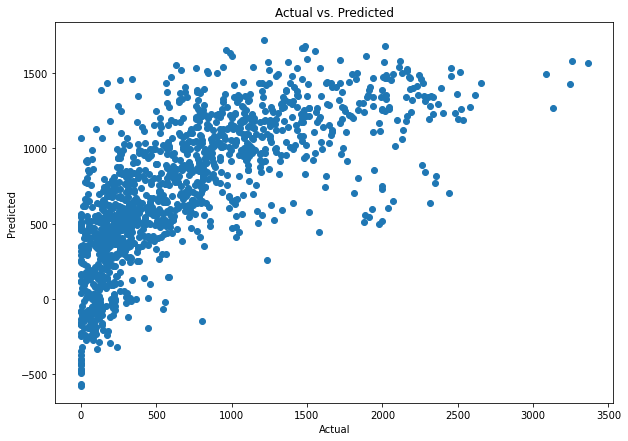

In [53]:
# Plotting the scatter plot of the y_test and the y_pred for the linear regression model

plt.figure(figsize=(10, 7))
plt.scatter(y_test, lin_reg_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [58]:
lin_pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': lin_reg_y_pred, 'Difference': y_test - lin_reg_y_pred})
lin_pred_y_df

,Actual Value,Predicted Value,Difference
475,190,294.170074,-104.170074
1494,95,-67.884720,162.884720
4549,1314,996.794280,317.205720
5470,1934,1387.033395,546.966605
4073,2355,1317.644154,1037.355846
...,...,...,...
2525,85,446.245117,-361.245117
5057,2099,1254.546775,844.453225
8502,369,543.487397,-174.487397
835,417,537.910315,-120.910315


In [49]:
# Computing the mean squared error for the linear regression

bike_demand_predictions = lin_reg.predict(X_train)
lin_reg_mse = mean_squared_error(y_train, bike_demand_predictions)
lin_reg_mse = np.sqrt(lin_reg_mse)
lin_reg_mse

430.90686165141875

In [50]:
# Model evaluation using the root mean squared error for the linear model

scores = cross_val_score(lin_reg, 
                         X_train, 
                         y_train, scoring = 'neg_mean_squared_error')
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([444.61599052, 430.7085913 , 438.19360604, 424.70851817,
       420.58777759])

In [51]:
# Computing the mean of the rms scores.

lin_reg_rmse_scores.mean()

431.7628967234442

In [53]:
# Designing the Decision Tree Regressor Model 

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [54]:
# Checking the predictions from the decision tree regression model

tree_reg_y_pred = tree_reg.predict(X_test)

print ('Predicted bike demand:\n', tree_reg_y_pred[:5])

Predicted bike demand:
 [ 103.   33. 1747. 1682. 2166.]


In [55]:
# Printing the actual labels for the test instances 

print ('Actual bike demand for the tested instances:\n',  (y_test[:5]))

Actual bike demand for the tested instances:
 475      190
1494      95
4549    1314
5470    1934
4073    2355
Name: Bike Demand, dtype: int64


In [56]:
# Model evaluation with the coefficient of determination (r2_score) for the decision tree regressor

coeff_determination = r2_score(y_test, tree_reg_y_pred)
coeff_determination

# the decision tree performs way better than the linear regressor

0.7541471593071994

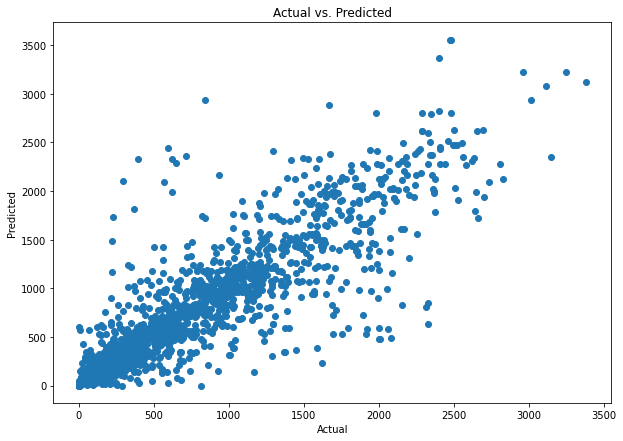

In [57]:
# Plotting the scatter plot of the y_test and the y_pred for the decision tree regression model

plt.figure(figsize=(10, 7))
plt.scatter(y_test, tree_reg_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Inference: way, way better performance than the linear regression

In [60]:
tree_pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': tree_reg_y_pred, 'Difference': y_test - tree_reg_y_pred})
tree_pred_y_df

,Actual Value,Predicted Value,Difference
475,190,103.0,87.0
1494,95,33.0,62.0
4549,1314,1747.0,-433.0
5470,1934,1682.0,252.0
4073,2355,2166.0,189.0
...,...,...,...
2525,85,122.0,-37.0
5057,2099,1923.0,176.0
8502,369,293.0,76.0
835,417,277.0,140.0


In [61]:
# Computing the mean squared error for the decision tree regressor

bike_demand_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, bike_demand_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

In [62]:
# Model evaluation of the decision tree using Cross Validation 

scores = cross_val_score(tree_reg, 
                         X_train, 
                         y_train, scoring = 'neg_mean_squared_error', 
                         cv = 10)

tree_reg_rmse_scores = np.sqrt(-scores)

In [63]:
tree_reg_rmse_scores

array([321.74060533, 327.40421169, 353.17464654, 297.22936239,
       319.66468032, 356.27898636, 340.77416897, 295.56974648,
       302.61774096, 324.62624223])

In [64]:
tree_reg_rmse_scores.mean()

323.90803912621743

In [65]:
# Random Forest Model 

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
# Checking the predictions from the random forest regression model

forest_reg_y_pred = forest_reg.predict(X_test)

print ('Predicted bike demand:\n', forest_reg_y_pred[:5])

Predicted bike demand:
 [ 201.25   70.93 1430.38 1858.86 2218.86]


In [67]:
# Printing the actual labels for the test instances 

print ('Actual bike demand for the tested instances:\n',  (y_test[:5]))

Actual bike demand for the tested instances:
 475      190
1494      95
4549    1314
5470    1934
4073    2355
Name: Bike Demand, dtype: int64


In [68]:
# Model evaluation with the coefficient of determination (r2_score) for the random forest regressor

coeff_determination = r2_score(y_test, forest_reg_y_pred)
coeff_determination 

# Inference: Random forest regressor actually performs better than both linear regression and decision tree regressor

0.8880946213684406

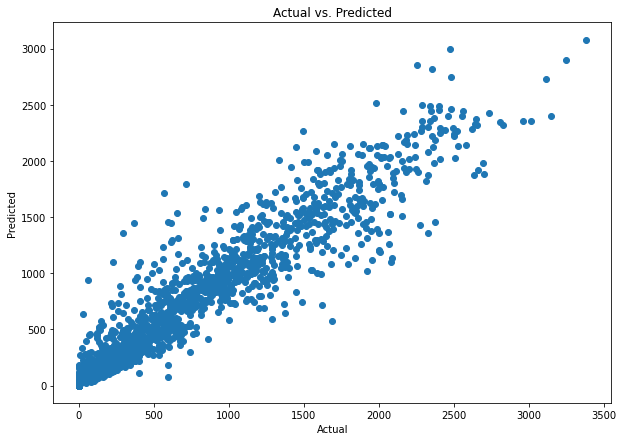

In [69]:
# Plotting the scatter plot of the y_test and the y_pred for the random forest regression model

plt.figure(figsize=(10, 7))
plt.scatter(y_test, forest_reg_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [70]:
forest_pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': forest_reg_y_pred, 'Difference': y_test - forest_reg_y_pred})
forest_pred_y_df 

,Actual Value,Predicted Value,Difference
475,190,201.25,-11.25
1494,95,70.93,24.07
4549,1314,1430.38,-116.38
5470,1934,1858.86,75.14
4073,2355,2218.86,136.14
...,...,...,...
2525,85,105.62,-20.62
5057,2099,1802.19,296.81
8502,369,225.84,143.16
835,417,387.09,29.91


In [71]:
# Computing the mean squared error for the decision tree regressor 

bike_demand_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, bike_demand_predictions)
forest_mse = np.sqrt(tree_mse)
forest_mse

0.0

In [72]:
forest_reg_cv_scores = cross_val_score(forest_reg, 
                                       X_train, 
                                       y_train, 
                                       scoring = 'neg_mean_squared_error', 
                                       cv = 10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

238.15639893709908

In [73]:
# Support Vector Machine Regressor 

svm_reg = SVR(kernel = 'linear')
svm_reg.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
# Checking the predictions from the svm regression model

svm_reg_y_pred = svm_reg.predict(X_test)

print ('Predicted bike demand:\n', svm_reg_y_pred[:5])

Predicted bike demand:
 [ 238.65278187   -9.47807129  952.02891449 1195.82759701 1214.89687806]


In [75]:
# Printing the actual labels for the test instances 

print ('Actual bike demand for the tested instances:\n',  (y_test[:5]))

Actual bike demand for the tested instances:
 475      190
1494      95
4549    1314
5470    1934
4073    2355
Name: Bike Demand, dtype: int64


In [76]:
# Model evaluation with the coefficient of determination (r2_score) for the svm regressor

coeff_determination = r2_score(y_test, svm_reg_y_pred)
coeff_determination

# Inference: SVM performs poorly, even worse than linear regression

0.47507585769708094

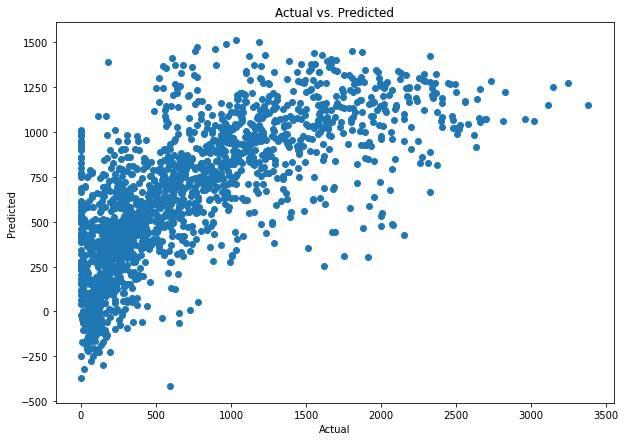

In [77]:
# Plotting the scatter plot of the y_test and the y_pred for the svm regression model

plt.figure(figsize=(10, 7))
plt.scatter(y_test, svm_reg_y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Inference: Not as good as any of the other models 

In [78]:
svm_pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': svm_reg_y_pred, 'Difference': y_test - svm_reg_y_pred})
svm_pred_y_df

,Actual Value,Predicted Value,Difference
475,190,238.652782,-48.652782
1494,95,-9.478071,104.478071
4549,1314,952.028914,361.971086
5470,1934,1195.827597,738.172403
4073,2355,1214.896878,1140.103122
...,...,...,...
2525,85,381.399774,-296.399774
5057,2099,1138.303172,960.696828
8502,369,371.675955,-2.675955
835,417,447.654504,-30.654504


In [79]:
# Computing the mean squared error for the decision tree regressor

bike_demand_predictions = svm_reg.predict(X_train)
svm_mse = mean_squared_error(y_train, bike_demand_predictions)
svm_mse = np.sqrt(tree_mse)
svm_mse

0.0

In [80]:
svm_cv_scores = cross_val_score(svm_reg,
                                X_train, 
                                y_train, 
                                scoring = 'neg_mean_squared_error', 
                                cv = 10)
svm_reg_rmse_scores = np.sqrt(-svm_cv_scores)
svm_reg_rmse_scores.mean()

461.98982757814537

In [81]:
# Hyperparameter tuning using GridSearchCV

param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8, 10]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3]}
]
forest_reg = RandomForestRegressor() # as the random forest regressor is the best performing model of the bunch

grid_search = GridSearchCV(forest_reg, param_grid, 
                           scoring = 'neg_mean_squared_error', 
                           return_train_score = True, 
                           cv = 10, 
                           )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [82]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [83]:
cv_scores = grid_search.cv_results_

# printing all the parameters together with their scores 

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores['params']):
  print(np.sqrt(-mean_score), params)

311.0766514074985 {'max_features': 2, 'n_estimators': 3}
267.7086860495387 {'max_features': 2, 'n_estimators': 10}
254.08802703037242 {'max_features': 2, 'n_estimators': 30}
285.54936011540036 {'max_features': 4, 'n_estimators': 3}
253.86969133077045 {'max_features': 4, 'n_estimators': 10}
243.23505556469416 {'max_features': 4, 'n_estimators': 30}
285.69614715366555 {'max_features': 6, 'n_estimators': 3}
251.4413655782511 {'max_features': 6, 'n_estimators': 10}
237.80322230240844 {'max_features': 6, 'n_estimators': 30}
280.6840493275416 {'max_features': 8, 'n_estimators': 3}
246.35110859458192 {'max_features': 8, 'n_estimators': 10}
240.04163334643502 {'max_features': 8, 'n_estimators': 30}
271.3116729803337 {'max_features': 10, 'n_estimators': 3}
248.18383558342626 {'max_features': 10, 'n_estimators': 10}
238.90678738990928 {'max_features': 10, 'n_estimators': 30}
297.95586642180325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
261.60768263858165 {'bootstrap': False, 'max

In [84]:
# Checking the feature importance

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.28365567, 0.25133459, 0.08787929, 0.0251695 , 0.03057715,
       0.05683036, 0.06461822, 0.04488656, 0.00202286, 0.00836062,
       0.00991706, 0.05325985, 0.00257288, 0.07891541])

In [85]:
data.dtypes

Bike Demand                int64
Time of Day                int64
Temperature              float64
Humidity                   int64
Wind Speed               float64
Visibility                 int64
Dew Point Temperature    float64
Solar Radiation          float64
Rainfall                 float64
Snowfall                 float64
Spring                     uint8
Summer                     uint8
Winter                     uint8
No Holiday                 uint8
WorkingDay Yes             uint8
dtype: object

In [86]:
sorted(zip(data, feature_importances), reverse=True)

[('Winter', 0.0025728832351214616),
 ('Wind Speed', 0.03057714719663238),
 ('Visibility', 0.056830360246143734),
 ('Time of Day', 0.2513345878281268),
 ('Temperature', 0.08787928872497595),
 ('Summer', 0.05325984599851853),
 ('Spring', 0.009917056978639751),
 ('Solar Radiation', 0.044886555159191745),
 ('Snowfall', 0.008360615994555991),
 ('Rainfall', 0.002022856544971479),
 ('No Holiday', 0.0789154105807591),
 ('Humidity', 0.025169503222606374),
 ('Dew Point Temperature', 0.06461821500587704),
 ('Bike Demand', 0.2836556732838797)]

In [87]:
forest_reg = RandomForestRegressor(max_features = 6, 
                                   n_estimators = 30)

forest_reg.fit(X_train, y_train)
forest_reg_cv_scores = cross_val_score(forest_reg, 
                                       X_train, 
                                       scoring = 'neg_mean_squared_error', 
                                       cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: fit() missing 1 required positional argument: 'y'

  FitFailedWarning)


nan

In [88]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [89]:
final_rmse

222.80367139578945

In [91]:
with open ('modelv2.bin', 'wb') as f_out:
  pickle.dump(final_model, f_out)
  f_out.close()